In [3]:
import tensorflow as tf
import os
import collections
import time
import random
import re
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from glob import glob
from PIL import Image
from tqdm import tqdm
from tensorflow.keras.applications.resnet import preprocess_input
from prep import Preparation

prep = Preparation()

In [4]:
with open("../dataset/captions.json") as jf:
    captions = json.loads(jf.read())

#Extract lstm from captions data set.
lstm_info = captions.pop("lstm_labels")

In [5]:
with open("../dataset/best_captions.json", "r") as jfec:
    data = json.loads(jfec.read())

target_data = data['target_paths']
distractor_data = data['distractor_paths']

with open("../dataset/easy_captions.json", "r") as jf:
    data_easy = json.loads(jf.read())

target_easy = data_easy['target_paths']
distractor_easy = data_easy['distractor_paths']

In [27]:
X = np.random.choice(22000,50).tolist()
Y = np.random.choice(22000,50).tolist()

In [90]:
def show_speaker_random(ind):
    targ_id = target_data[ind]
    dist_id = distractor_data[ind]

    caption = captions[targ_id]
    print(caption)

    img_A = mpimg.imread(f"../dataset/prep_data/{targ_id}.jpg")
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img_A)

    return

def show_speaker_disc(ind):
    targ_id = target_data[ind]
    dist_id = distractor_data[ind]

    caption = captions[str(targ_id)]
    print(caption)

    img_A = mpimg.imread(f"../dataset/prep_data/{targ_id}.jpg")
    img_B = mpimg.imread(f"../dataset/prep_data/{dist_id}.jpg")
    
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img_A)
    ax[1].imshow(img_B)

    return

    

In [29]:
def show_listener(ind):
    img_A = mpimg.imread(f"../dataset/prep_data/{target_data[ind]}.jpg")
    img_B = mpimg.imread(f"../dataset/prep_data/{distractor_data[ind]}.jpg")

    rand_n = random.uniform(0,1)

    if rand_n < 0.5:
        t = 0
        d = 1
    else:
        t = 1
        d = 0

    fig, ax = plt.subplots(1,2)
    ax[t].imshow(img_A)
    ax[d].imshow(img_B)

    return t

In [30]:
result_easy_random = []
result_hard_random = []
result_easy_disc = []
result_hard_disc = []

count_er = 0
count_hr = 0
count_ed = 0
count_hd = 0

In [83]:
### EASY RANDOM ###
if count_er <= 25:
    print(count_er)
    count_er += 1
    c_ind = Y.pop(0)
    show_speaker_random(c_ind)
else:
    print("Done")

Done


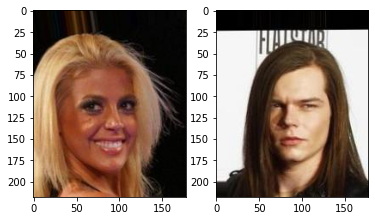

In [84]:
result_easy_random.append(show_listener(c_ind))

0
['She has a pointy nose.', 'She has wavy hair.', 'She is older.']


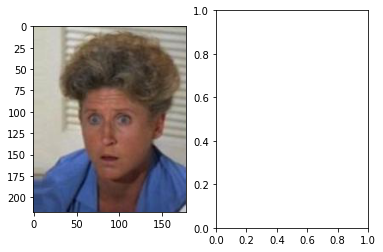

In [85]:
### HARD RANDOM ###
if count_hr <= 25:
    print(count_hr)
    count_hr += 1
    c_ind = X.pop(0)
    show_speaker_random(c_ind)
else:
    print("Done")

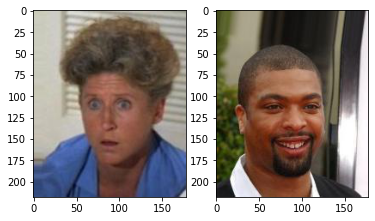

In [88]:
result_hard_random.append(show_listener(c_ind))

1
['She has blond hair.', 'She is smiling.', 'She is wearing earings.', 'She is wearing lipstick.', 'She is older.']


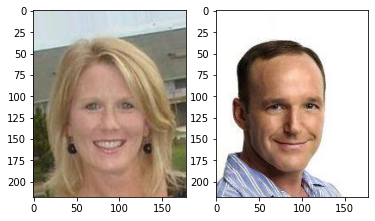

In [91]:
### EASY DISC ###
if count_ed <= 25:
    print(count_ed)
    count_ed += 1
    c_ind = Y.pop(0)
    show_speaker_disc(c_ind)
else:
    print("Done")

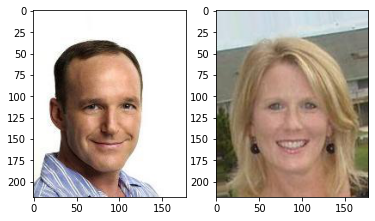

In [92]:
result_easy_disc.append(show_listener(c_ind))

0
['He has a big nose.', 'He has wavy hair', 'He is wearing a necktie.', 'He is younger.']


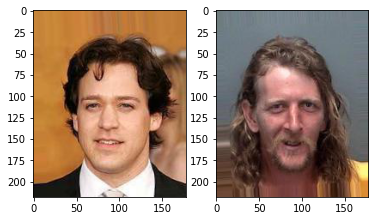

In [93]:
### HARD DISC ###
if count_hd <= 25:
    print(count_hd)
    count_hd += 1
    c_ind = X.pop(0)
    show_speaker_disc(c_ind)
else:
    print("Done")

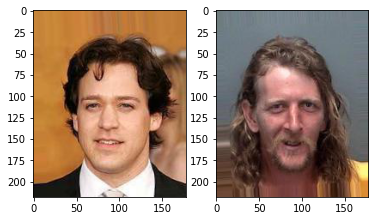

In [94]:
result_hard_disc.append(show_listener(c_ind))